In [77]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



from wordcloud import WordCloud, STOPWORDS

In [78]:
data=pd.read_csv('../data/dataFromCleaner.csv')

In [79]:
data.head()

,Unnamed: 0,reviews,stars,date,country,Verified
0,0,Easy check in a T5. Galleries south and Nort...,8,2023-08-13,United Kingdom,True
1,1,"Flight delayed by an hour, it happens, no bi...",2,2023-08-12,United States,False
2,2,The staff are very rude and not trained prope...,2,2023-08-11,United Kingdom,False
3,3,Good domestic flight operated by BA Cityflye...,10,2023-08-08,United Kingdom,True
4,4,Failed at all basic travel fundamentals: 1) O...,1,2023-08-08,Canada,False


In [80]:
data=data.drop(columns='Unnamed: 0')

In [81]:
data['stars'].mean().round(2)

3.67

In [82]:
data.nunique()

reviews     350
stars        10
date        239
country      35
Verified      2
dtype: int64

In [83]:
reting_num=1
for x in data.reviews:
    reting_num+=1
    
print(reting_num)

351


In [84]:
data.head()

,reviews,stars,date,country,Verified
0,Easy check in a T5. Galleries south and Nort...,8,2023-08-13,United Kingdom,True
1,"Flight delayed by an hour, it happens, no bi...",2,2023-08-12,United States,False
2,The staff are very rude and not trained prope...,2,2023-08-11,United Kingdom,False
3,Good domestic flight operated by BA Cityflye...,10,2023-08-08,United Kingdom,True
4,Failed at all basic travel fundamentals: 1) O...,1,2023-08-08,Canada,False


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   350 non-null    object
 1   stars     350 non-null    int64 
 2   date      350 non-null    object
 3   country   350 non-null    object
 4   Verified  350 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 11.4+ KB


Text(0.5, 0.98, 'Counts for each rating')

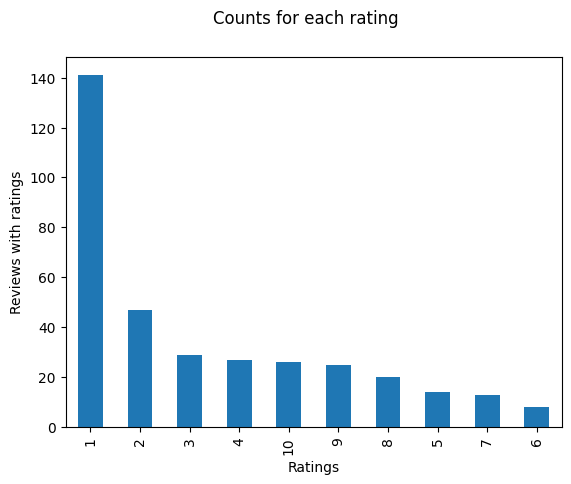

In [86]:
data.stars.value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Reviews with ratings')
plt.suptitle('Counts for each rating')

In [87]:
df_ratings = pd.DataFrame(data.stars.value_counts())
pct_values = (df_ratings.values/ df_ratings.values.sum() *100).tolist()
pct_values = [round(x[0],2) for x in pct_values]
df_ratings['pct_values'] = pct_values
df_ratings = df_ratings.reset_index()


In [88]:
df_ratings

,stars,count,pct_values
0,1,141,40.29
1,2,47,13.43
2,3,29,8.29
3,4,27,7.71
4,10,26,7.43
5,9,25,7.14
6,8,20,5.71
7,5,14,4.00
8,7,13,3.71
9,6,8,2.29


In [89]:
df_ratings.rename(columns={'stars':'Stars', 'count':'total_counts'}, inplace=True)


In [90]:
df_ratings

,Stars,total_counts,pct_values
0,1,141,40.29
1,2,47,13.43
2,3,29,8.29
3,4,27,7.71
4,10,26,7.43
5,9,25,7.14
6,8,20,5.71
7,5,14,4.00
8,7,13,3.71
9,6,8,2.29


Text(0.5, 1.0, 'Counts for each ratings')

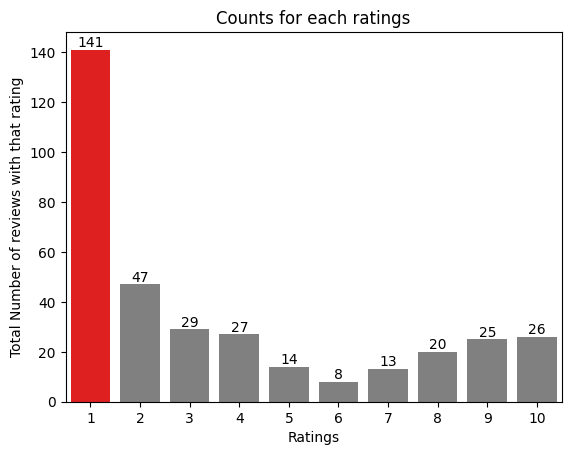

In [91]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,palette=clrs)
ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


In [92]:
# Unique countries BA recieved the reviews from

print(f"{len(data.country.unique())} unique countries")

35 unique countries


In [93]:
# Which country most review comes from?
df_country_review = pd.DataFrame(data.country.value_counts().head()).reset_index()


In [94]:
df_country_review

,country,count
0,United Kingdom,181
1,United States,77
2,Canada,15
3,Australia,10
4,South Africa,6


In [95]:
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)


In [96]:
df_country_review

,country,total_reviews
0,United Kingdom,181
1,United States,77
2,Canada,15
3,Australia,10
4,South Africa,6


Text(0.5, 1.0, 'Maximum number of review by country')

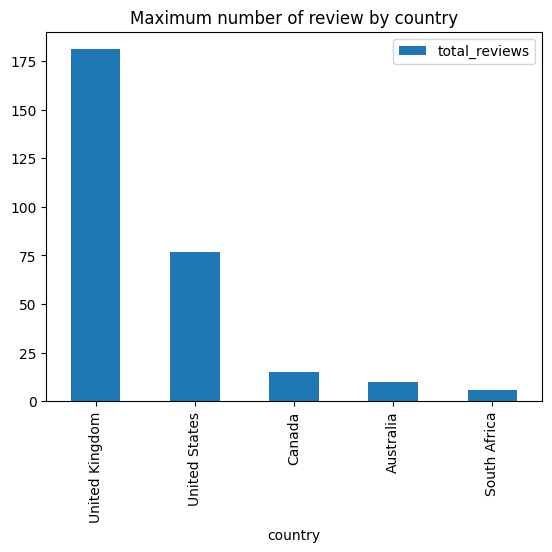

In [97]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [98]:
df_country_rating =data.groupby('country')['stars'].mean().sort_values(ascending=False)

df_country_rating=pd.DataFrame(df_country_rating.items(), columns=["country", "avg_rating"])

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

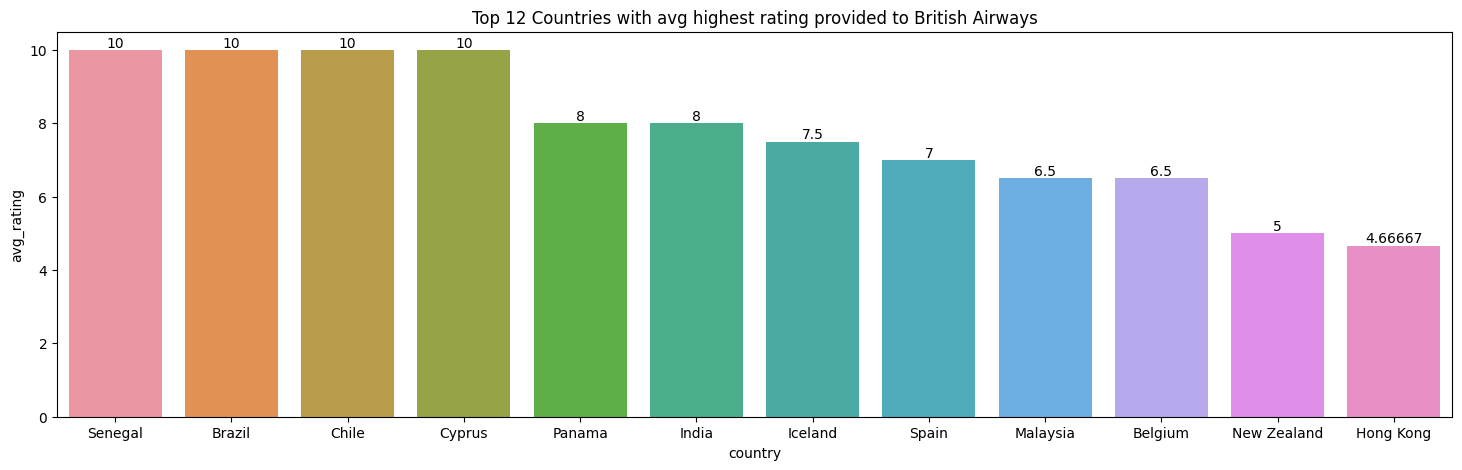

In [99]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [100]:
# Time Series Analysis
data.date = pd.to_datetime(data.date)


In [101]:
fig = px.line(data, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

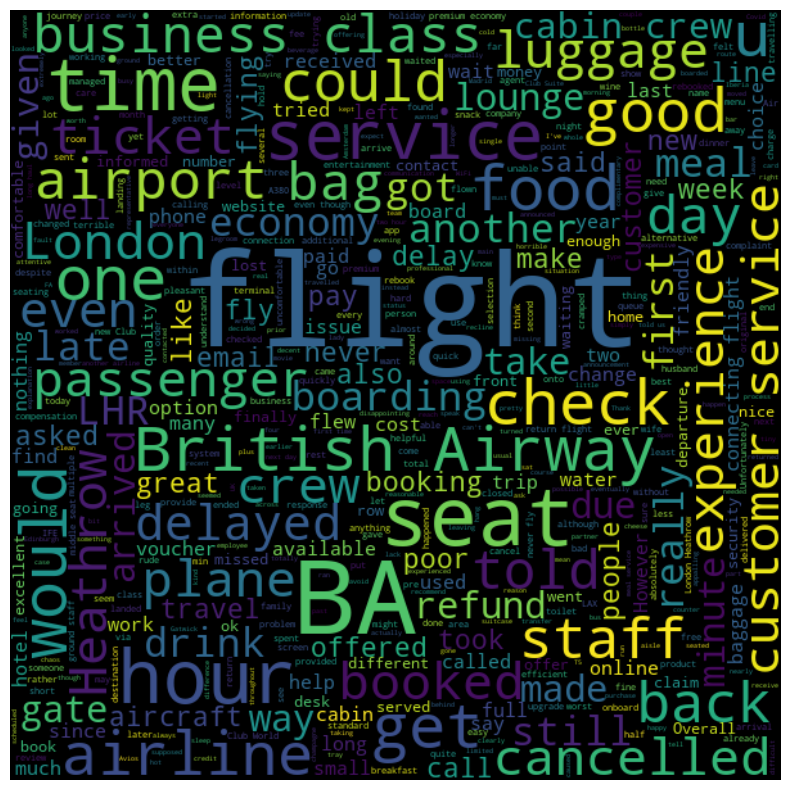

In [102]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(data.reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

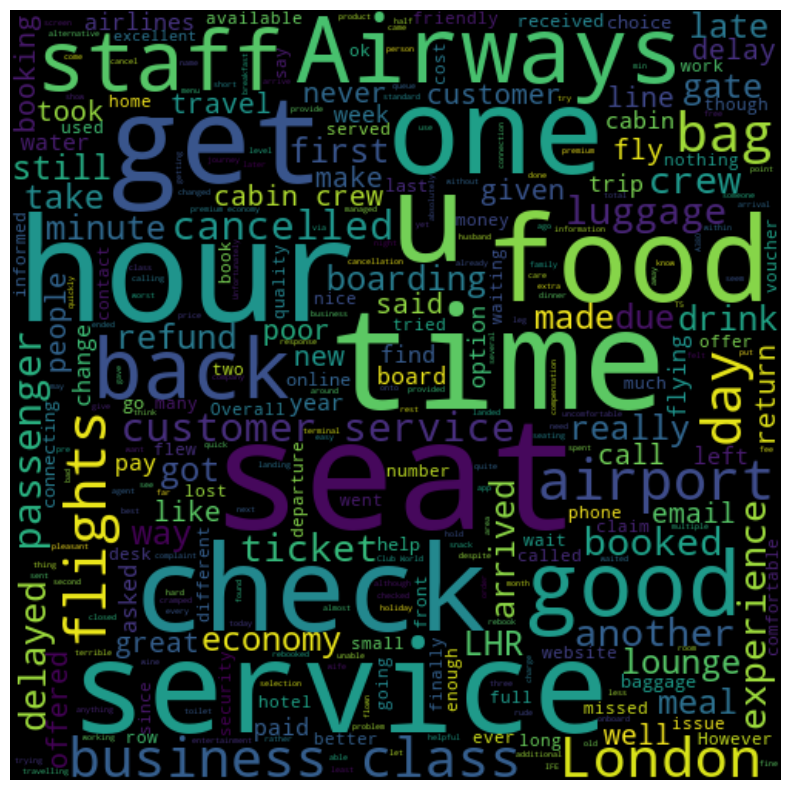

In [103]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(data.reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [129]:
# Word Frequency
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review",'I','','-','BA','The','We','British','did','told','lounges','product'])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'service'),
  Text(1, 0, 'time'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'crew'),
  Text(4, 0, 'hours'),
  Text(5, 0, 'flight.'),
  Text(6, 0, 'Airways'),
  Text(7, 0, 'staff'),
  Text(8, 0, 'customer'),
  Text(9, 0, 'food'),
  Text(10, 0, 'seats'),
  Text(11, 0, 'check'),
  Text(12, 0, 'good'),
  Text(13, 0, 'just'),
  Text(14, 0, 'London'),
  Text(15, 0, 'Heathrow'),
  Text(16, 0, 'business'),
  Text(17, 0, 'cabin'),
  Text(18, 0, 'flights'),
  Text(19, 0, 'They')])

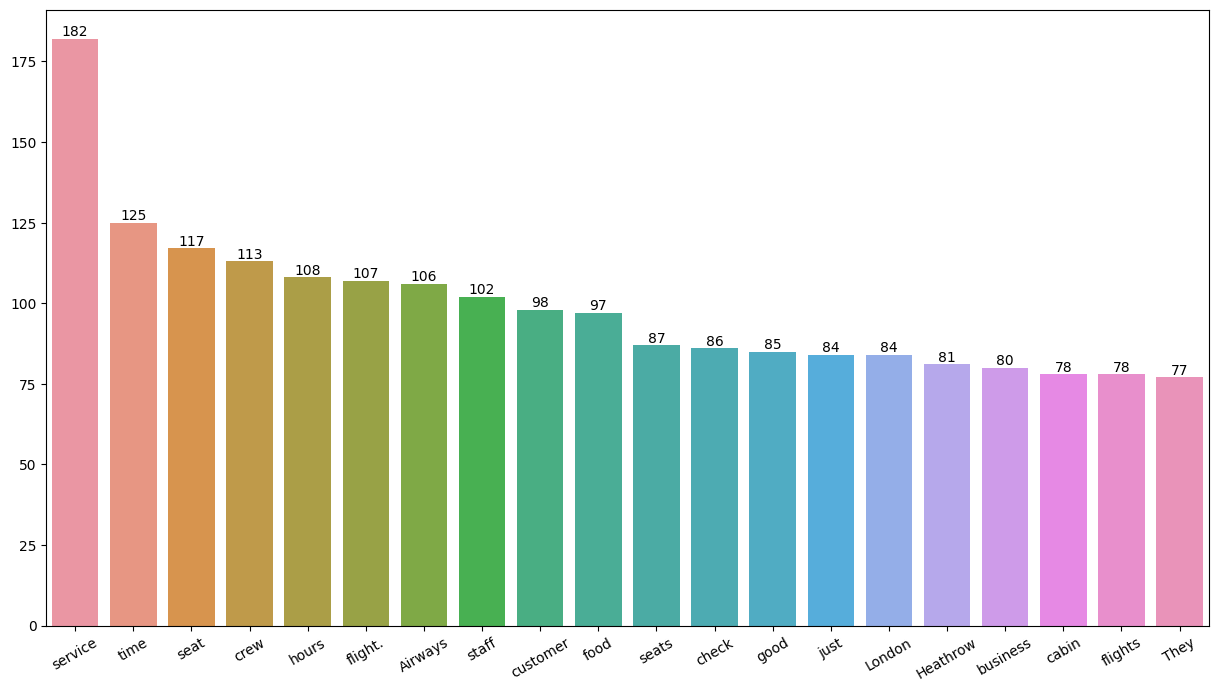

In [130]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

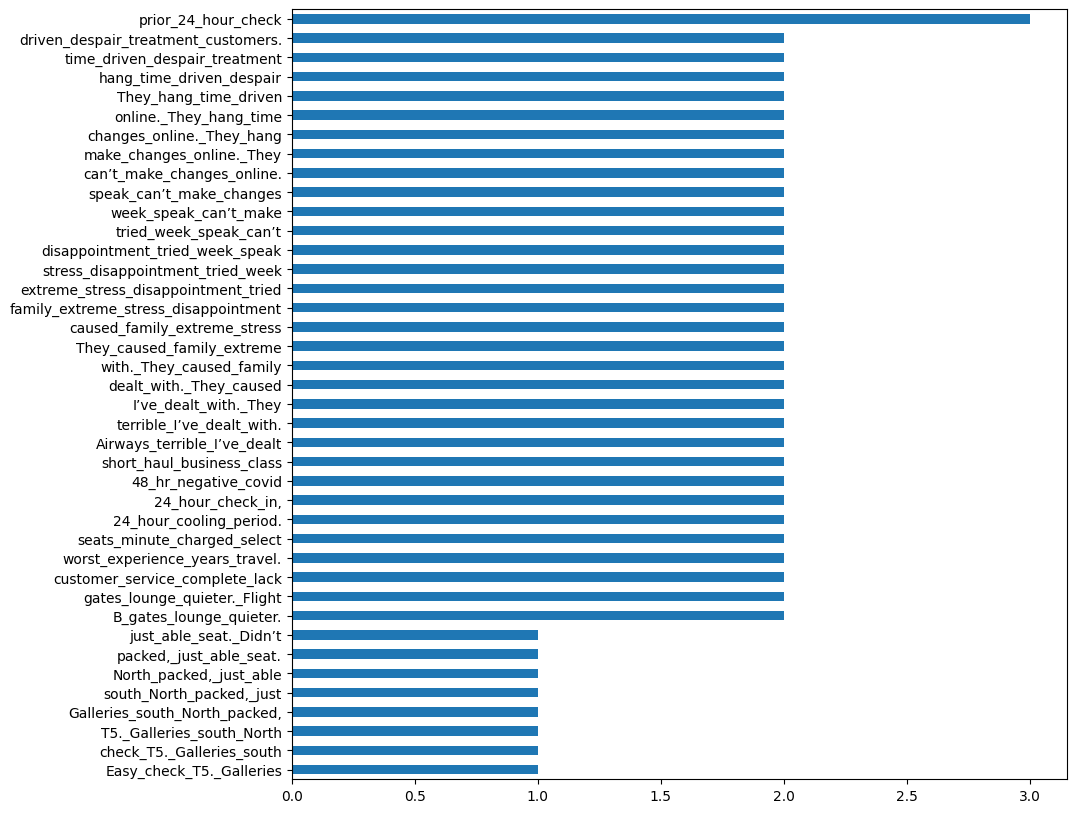

In [131]:
# Word Frequency with N-gram
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(data.reviews)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words,4)

In [107]:
ratings_1_3 = data[data.stars.isin([1,2,3])]
ratings_4_6 = data[data.stars.isin([4,5,6])]
ratings_7_10 = data[data.stars.isin([7,8,9,10])]

<Axes: >

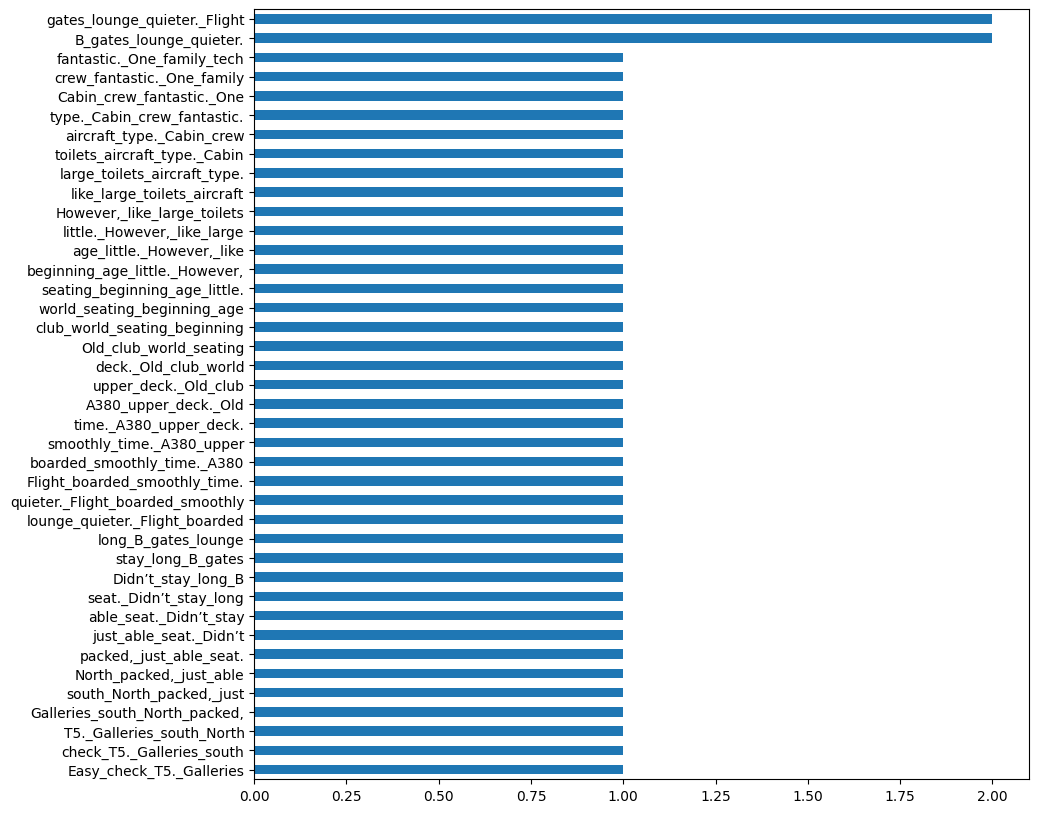

In [132]:
reviews_1_3 = " ".join(ratings_1_3.reviews)
reviews_4_6 = " ".join(ratings_4_6.reviews)
reviews_7_10 = " ".join(ratings_7_10.reviews)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

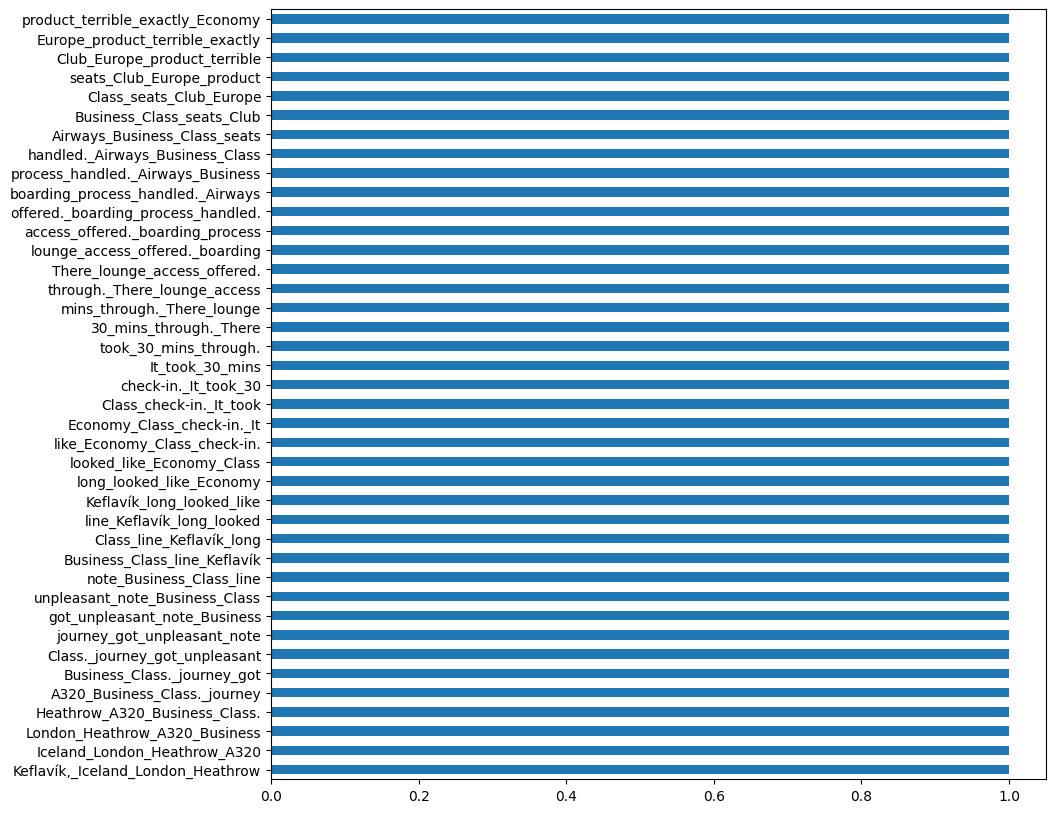

In [109]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

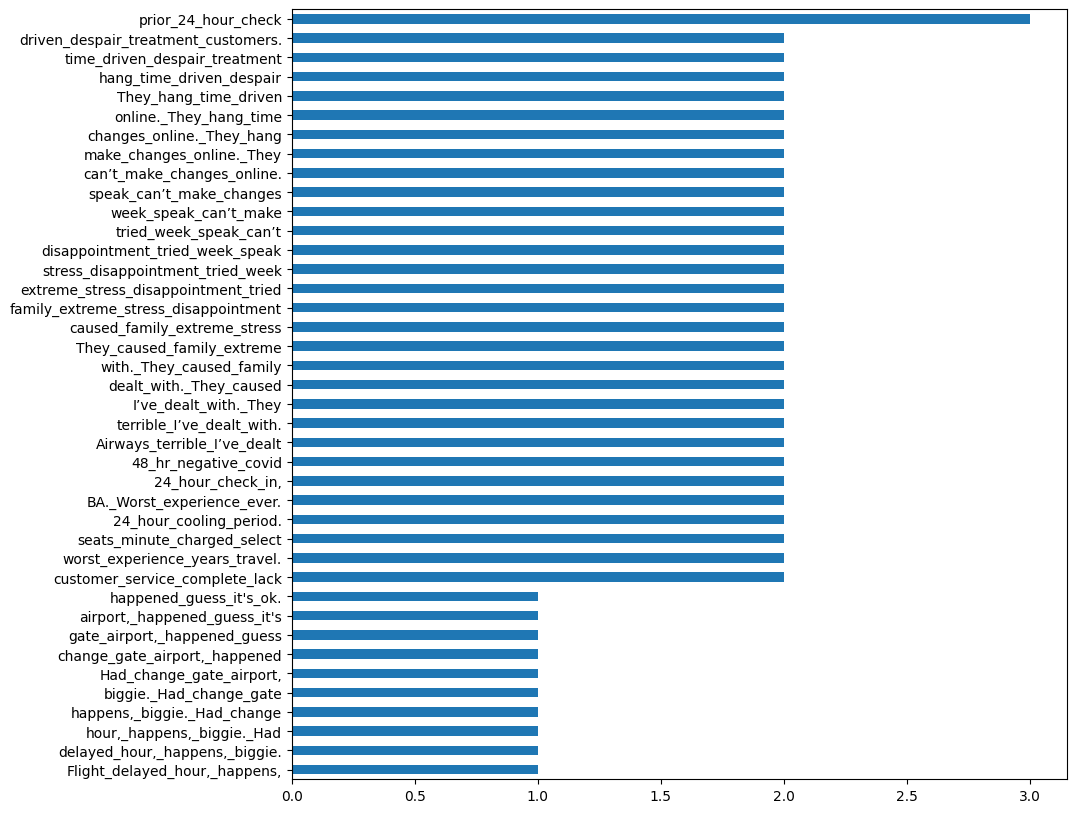

In [110]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [111]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
data['polarity'] = 0

for i in range(len(data.reviews)):
    sent= TextBlob(data.reviews[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    data['polarity'][i] = polarity

In [112]:
print(f"{data[(data['polarity'] >-0.2) & (data['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{data[(data['polarity'] >-0.1) & (data['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


243 number of reviews between -0.2 and 0.2 polarity score
174 number of reviews between -0.1 and 0.1 polarity score


In [113]:
import nltk
nltk.download('vader_lexicon')


from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()

# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
data['label'] = 0
    
for i in range(len(data.reviews)):
    
    score = vds.polarity_scores(data.reviews[i])['compound']
    #print(score)
    if score > 0.2:
        data['label'][i] = 1
        #print("1st")
    elif score < 0:
        data['label'][i] = -1
        #print("2nd")
    else:
        data['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ELVIS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ELVIS\AppData\Local\Temp\ipykernel_22180\1074911390.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ELVIS\AppData\Local\Temp\ipykernel_22180\1074911390.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ELVIS\AppData\Local\Temp\ipykernel_22180\1074911390.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [114]:
data.label.value_counts()


label
-1    192
 1    147
 0     11
Name: count, dtype: int64

In [115]:
# Topic Modeling with LDA
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(data.reviews).toarray()
tf_feature_names = vect.get_feature_names_out()

In [116]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
data_topic =pd.DataFrame(topic_dict)

In [117]:
data_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,communication,5.4,the,469.5,the,163.1,wir,7.1,of,25.6,the,1580.4,singapore,4.0,the,224.3
1,whatsoever,2.1,and,350.0,was,66.9,she,6.6,the,24.3,to,1525.3,test,3.1,and,121.4
2,intention,2.1,was,340.3,and,63.5,und,6.1,to,11.5,and,976.8,purposely,3.1,to,110.9
3,cancellations,1.7,to,163.2,in,55.0,haben,3.1,this,11.4,was,600.3,conditions,3.1,of,83.3
4,held,1.7,in,149.0,to,45.7,wieder,3.1,for,10.2,in,525.8,keflavík,3.1,for,57.5
5,poor,1.5,on,147.9,on,41.8,crew,2.3,no,9.2,flight,516.2,negative,3.0,was,55.1
6,she,1.3,of,134.3,no,36.0,usual,2.1,food,8.9,we,503.4,hr,3.0,flight,53.7
7,kiosk,1.1,flight,119.1,of,33.2,letzten,2.1,only,8.7,for,459.7,ordered,2.7,we,42.6
8,complained,1.1,very,118.7,seat,32.7,puerto,2.1,any,8.1,of,434.3,delayed,2.5,were,40.9
9,fulfil,1.1,good,114.2,this,32.4,mit,2.1,was,8.0,my,429.5,cairo,2.5,is,38.8


In [118]:
# Topic modeling with NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[3.34225461e-02, 1.16655802e-01],
       [9.58922079e-02, 0.00000000e+00],
       [0.00000000e+00, 1.63967802e-01],
       [6.49209575e-03, 1.70290153e-01],
       [5.22105826e-02, 1.63470839e-02],
       [2.94948923e-02, 2.28705065e-01],
       [4.66797623e-02, 9.23280684e-02],
       [3.28820581e-02, 5.39437940e-02],
       [0.00000000e+00, 5.89818233e-01],
       [1.03219469e-01, 1.35287559e-02],
       [2.32825782e-02, 2.96665484e-01],
       [0.00000000e+00, 3.81705333e-01],
       [7.49654085e-01, 5.92822398e-01],
       [4.07313244e-02, 5.48100102e-02],
       [2.13094529e-02, 4.96318340e-02],
       [2.65387711e-01, 4.31083573e-01],
       [3.08550717e-01, 1.11176418e-01],
       [3.73937457e-01, 4.68984630e-01],
       [1.37317458e-01, 4.16987240e-01],
       [7.16322962e-02, 2.67250112e-01],
       [6.24491645e-02, 1.66875643e-01],
       [1.89714030e-02, 4.68230217e-01],
       [2.27341159e-01, 3.55183799e-02],
       [9.88211498e-03, 1.19829576e-01],
       [1.441941

In [119]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
data_topic =pd.DataFrame(topic_dict)

In [120]:
data_topic


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,to,30.5,the,21.7
1,we,18.2,was,10.4
2,the,17.2,and,10.2
3,and,14.4,to,8.0
4,flight,10.2,of,6.0
5,for,8.3,in,5.6
6,they,8.2,on,4.8
7,our,7.5,for,3.7
8,that,7.2,flight,3.3
9,in,6.9,it,3.2
